In [1]:
import os

import numpy as nrc_py
import pandas as pnl_data

In [2]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path)
    column_list = data.columns.values.tolist()
    column_list.remove('id')

    if 'target' in column_list:
        # for the training dataset, label column is provided.
        column_list.remove('target')
        X = data[column_list].values
        y = data['target'].astype('int').values
        return X, y
    else:
        # for the testing dataset, label column is not provided.
        X = data[column_list].values
        return X

In [3]:
"""
This cell is for data analyzing

"""
data = pnl_data.read_csv('./dont-overfit-ii/train.csv')
data.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
"""
This cell is for data analyzing

"""
data.info()
data.shape # with column id and target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


(250, 302)

In [5]:
"""
This cell is for data analyzing

"""
data.isnull().sum()
data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [6]:
"""
This cell is for data analyzing

"""
data.corr()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
id,1.000000,-0.151498,0.029519,-0.018465,-0.176930,0.024949,0.016726,-0.016244,0.084511,-0.037473,...,-0.026179,0.104573,-0.076038,0.061150,0.022245,-0.064452,-0.027832,-0.032826,0.000657,-0.022638
target,-0.151498,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.029519,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.018465,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.176930,-0.015141,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.064452,-0.170501,-0.024839,0.042820,-0.028690,-0.005016,-0.050318,0.026868,-0.023192,0.032648,...,-0.030738,-0.020251,0.015083,-0.139025,-0.015920,1.000000,-0.072721,-0.036572,-0.034341,0.097052
296,-0.027832,0.007434,-0.051288,-0.127499,-0.071835,0.034551,-0.030017,0.070294,0.036903,-0.006235,...,0.016047,0.042079,-0.045879,-0.011766,0.125693,-0.072721,1.000000,-0.002007,0.056297,0.040264
297,-0.032826,0.056810,0.029143,0.065883,0.069395,0.089963,0.029747,0.069243,0.037912,0.014628,...,0.048496,0.066474,-0.025382,0.021148,-0.103255,-0.036572,-0.002007,1.000000,0.039793,-0.141078
298,0.000657,-0.134760,0.065951,0.055470,0.083946,-0.066438,-0.008517,-0.048009,0.171640,-0.031094,...,-0.125556,0.087400,0.008096,-0.005422,-0.063242,-0.034341,0.056297,0.039793,1.000000,-0.092017


In [7]:
X, y = read_data_from_csv('./dont-overfit-ii/train.csv')
print('Shape of X:', X.shape)  # sample, feature
print('Shape of y:', y.shape)  # sample (0, 1)

Shape of X: (250, 300)
Shape of y: (250,)


In [8]:
"""
This cell is for data analyzing

"""
print(X)
print(X[0])
print(y)  # (0, 1)
print(type(y[0]))

[[-0.098  2.165  0.681 ... -0.414  1.038 -1.065]
 [ 1.081 -0.973 -0.383 ... -1.099 -0.936  0.973]
 [-0.523 -0.089 -0.348 ...  0.004  0.8   -1.211]
 ...
 [ 1.411 -1.465  0.119 ...  0.76   0.168 -0.719]
 [ 0.62   1.04   0.184 ... -0.805  2.029 -0.423]
 [ 0.489  0.403  0.139 ... -1.454 -0.625  1.474]]
[-0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276 -2.246  1.825
 -0.912 -0.107  0.305  0.102  0.826  0.417  0.177 -0.673 -0.503  1.864
  0.41  -1.927  0.102 -0.931  1.763  1.449 -1.097 -0.686 -0.25  -1.859
  1.125  1.009 -2.296  0.385 -0.876  1.528 -0.144 -1.078 -0.403  0.005
  1.405 -0.044 -0.458  0.579  2.929  0.833  0.761  0.737  0.669  0.717
 -1.542 -1.847 -0.445  1.238 -0.84  -1.891 -1.531 -0.396 -0.927  2.072
  0.946 -1.105  0.008  0.933 -1.41  -0.77   1.74  -1.504 -0.391 -1.551
 -1.415 -0.974  0.796 -2.464 -1.424  1.23   0.219  0.13  -0.371 -0.93
  1.851  1.292 -0.38   1.318  1.146 -0.399  2.227  0.447  0.87   1.42
 -1.675  0.019  0.06   0.768  2.563  0.638  1.164  0.407 -1.556

In [9]:
"""
This cell is for data analyzing

"""
print(type(X[0]))
print(type(X[0][0]))
print(X[0][0])

<class 'numpy.ndarray'>
<class 'numpy.float64'>
-0.098


In [10]:
"""
    
    The model design starts here!!!
    The model design starts here!!!
    The model design starts here!!!
    
"""

'\n    \n    The model design starts here!!!\n    The model design starts here!!!\n    The model design starts here!!!\n    \n'

In [11]:
def step_Function(x):
    return 1 if x > 0 else 0
def linear_Activation_Function(a, x):
    return a*x
def sigmoid_Activation_Function(x):
    return 1./(1+nrc_py.exp(-x))
def tanh_Activation_Function(x):
    return 2*sigmoid_Activation_Function(2*x)-1
""" Reference: https://towardsdatascience.com/what-is-activation-function-1464a629cdca """

' Reference: https://towardsdatascience.com/what-is-activation-function-1464a629cdca '

In [12]:
#print(y)
#print(y[0])
import random
def initializeWeights(y, numberOfInputs):
    rand = []
    for i in range(0, numberOfInputs):
        # Last one for the Bias
        rand.append(random.uniform(-0.01, 0.01))
    #print(len(rand))
    #print(nrc_py.array(rand).shape, y.shape)
    return nrc_py.array(rand)

def Layer1(x, L1): 
    for i in range(0, 100): 
        sum = 0 
        # For the first hidden Layer, we output 100 neurons 
        for j in range(0, 300): 
            sum = sum + (x[j] * weightsForLayerOne[i][j])
        sum = sigmoid_Activation_Function(sum) 
        L1.append(sum) 
        #print(sum) # For Debugging 
    # For the Bias
    #print("sum = ", sum, ", bias", weightsForLayerOne[i][300])
    sum = sum + (1 * weightsForLayerOne[i][300])
    #print("sum = ", sum)
    sum = tanh_Activation_Function(sum)
    L1.append(sum) 
    #print(sum) # For Debugging
    return L1

def Layer2(x, L2): 
    for i in range(0, 1): 
        sum = 0 
        # For the first hidden Layer, we output 100 neurons 
        for j in range(0, 100): 
            sum = sum + (x[j] * weightsForLayerOutput[i][j]) 
        L2 = step_Function(sum)
    # For the Bias
    sum = sum + (1 * weightsForLayerOutput[i][100])
    #print(sum) # For Debugging
    L2 = step_Function(sum)
    return L2


def Error_Function(L2, y):
    #print(L2) # For Debugging
    #print(y) # For Debugging
    if L2 - y == 0:
        return 0
    else: return y - L2

In [13]:
learning_Rate = 0.001
Accuracy = []

weightsForLayerOne = nrc_py.empty((100, 301))
weightsForLayerOutput = nrc_py.empty((1, 101)) 
#print(weightsForLayerOne.shape) 
for i in range(0, 100): 
    weightsForLayerOne[i] = initializeWeights(weightsForLayerOne[i], 301) 
for i in range(0, 1): 
    weightsForLayerOutput[i] = initializeWeights(weightsForLayerOutput[i], 101)
    
#print(weightsForLayerOne) # For Debugging
#print(weightsForLayerOutput) # For Debugging
#print(len(weightsForLayerOne)) # For Debugging 
#print(weightsForLayerOne[1].shape) # For Debugging

e = 1
Acc = 0
while Acc < 0.704:
    numberOfCorrectPredictions = 0
    for iterations in range(0, 250):
        L1 = [] # Layer 1
        L2 = 0 # Layer 2
        L1 = Layer1(X[iterations], L1)
        L2 = Layer2(L1, L2)
        #print(len(L1)) # For Debugging
        #print(L1) # For Debugging

        error = Error_Function(L2, y[iterations])
        if error != 0:
            for i in range(0, 101):
                #print(weightsForLayerOutput[0][i]) # For Debugging
                weightsForLayerOutput[0][i] = weightsForLayerOutput[0][i] + (learning_Rate * error * L1[i])
                #print("update V = ", weightsForLayerOutput[0][i]) # For Debugging
            for i in range(0, 100):
                for j in range(0, 300):
                    #print(weightsForLayerOutput[0][i]) # For Debugging
                    weightsForLayerOne[i][j] = weightsForLayerOne[i][j] + (learning_Rate * error * weightsForLayerOutput[0][i] * L1[i] * (1 - L1[i]) * X[0][j])
                    #print("update V = ", weightsForLayerOutput[0][i]) # For Debugging
                #print(weightsForLayerOutput[0][i]) # For Debugging
                weightsForLayerOne[i][300] = weightsForLayerOne[i][300] + (learning_Rate * error * weightsForLayerOutput[0][i] * L1[i] * (1 - L1[i]) * 1)
                #print("update V = ", weightsForLayerOutput[0][i]) # For Debugging
        else:
            numberOfCorrectPredictions = numberOfCorrectPredictions + 1
    
    #print(weightsForLayerOutput) # For Debugging
    print(numberOfCorrectPredictions, ", ", e)
    Acc = numberOfCorrectPredictions / 250
    print("Accuracy = ", Acc )
    Accuracy.append(Acc)
    e = e + 1


133 ,  1
Accuracy =  0.532
132 ,  2
Accuracy =  0.528
132 ,  3
Accuracy =  0.528
132 ,  4
Accuracy =  0.528
132 ,  5
Accuracy =  0.528
132 ,  6
Accuracy =  0.528
132 ,  7
Accuracy =  0.528
132 ,  8
Accuracy =  0.528
132 ,  9
Accuracy =  0.528
132 ,  10
Accuracy =  0.528
132 ,  11
Accuracy =  0.528
132 ,  12
Accuracy =  0.528
132 ,  13
Accuracy =  0.528
132 ,  14
Accuracy =  0.528
132 ,  15
Accuracy =  0.528
132 ,  16
Accuracy =  0.528
136 ,  17
Accuracy =  0.544
138 ,  18
Accuracy =  0.552
140 ,  19
Accuracy =  0.56
144 ,  20
Accuracy =  0.576
136 ,  21
Accuracy =  0.544
137 ,  22
Accuracy =  0.548
140 ,  23
Accuracy =  0.56
144 ,  24
Accuracy =  0.576
146 ,  25
Accuracy =  0.584
144 ,  26
Accuracy =  0.576
144 ,  27
Accuracy =  0.576
146 ,  28
Accuracy =  0.584
142 ,  29
Accuracy =  0.568
138 ,  30
Accuracy =  0.552
134 ,  31
Accuracy =  0.536
134 ,  32
Accuracy =  0.536
132 ,  33
Accuracy =  0.528
132 ,  34
Accuracy =  0.528
132 ,  35
Accuracy =  0.528
132 ,  36
Accuracy =  0.528
132

In [14]:
# Start testing with Unseen Data
UnseenData = read_data_from_csv('./dont-overfit-ii/test.csv')

In [15]:
print('Shape of UnseenData:', UnseenData.shape)  # k_sample, m_feature

Shape of UnseenData: (19750, 300)


In [16]:
predictedUnseenLabels = []
for iterations in range(0, 19750):
    L1 = [] # Layer 1
    L2 = 0 # Layer 2
    L1 = Layer1(UnseenData[iterations], L1)
    L2 = Layer2(L1, L2)
    #print(len(L1)) # For Debugging
    #print(L1) # For Debugging
    predictedUnseenLabels.append(L2)

In [17]:
print(len(predictedUnseenLabels)) # For Debugging
print(predictedUnseenLabels) # For Debugging

19750
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 

In [18]:
id_header = []
for i in range(250, 20000):
    id_header.append(i)

output = pnl_data.DataFrame({'id' : id_header, 'target': predictedUnseenLabels})
output.to_csv('result.csv', index=False)

In [19]:
#xxx = pnl_data.read_csv('result.csv')
#xxx.info()
#xxx.shape

In [20]:
print(len(Accuracy)) # For Debugging

140


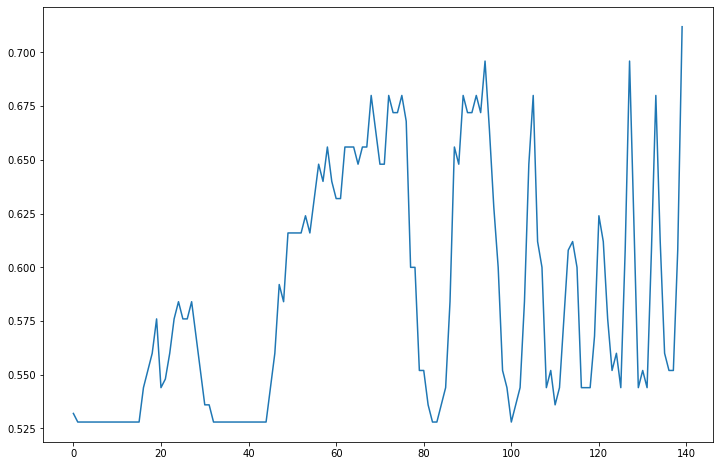

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(Accuracy)
plt.savefig('plot_Trial3.jpg', dpi=300, bbox_inches='tight')
plt.show()